# Libraries

In [1]:
# Disable all warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np   # linear algebra
import pandas as pd  # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
import tensorflow
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import SimpleRNN
from keras.layers import LSTM
from keras.layers import Dropout

# Load the Data

In [3]:
data = pd.read_csv('/content/INR=X.csv')
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-27,71.320000,71.635002,71.320000,71.324997,71.324997,0
1,2020-01-28,71.654999,71.654999,71.178001,71.440002,71.440002,0
2,2020-01-29,71.230103,71.425003,71.168503,71.230400,71.230400,0
3,2020-01-30,71.300003,71.711998,71.300003,71.300003,71.300003,0
4,2020-01-31,71.639999,71.639999,71.277496,71.639999,71.639999,0
...,...,...,...,...,...,...,...
257,2021-01-20,73.192001,73.192299,72.899300,73.191902,73.191902,0
258,2021-01-21,72.907898,73.045303,72.883003,72.910896,72.910896,0
259,2021-01-22,72.954903,73.237503,72.929001,72.954903,72.954903,0
260,2021-01-25,72.995903,73.220001,72.877998,72.995903,72.995903,0


In [4]:
data.drop('Date', axis = 1, inplace = True)
data

,Open,High,Low,Close,Adj Close,Volume
0,71.320000,71.635002,71.320000,71.324997,71.324997,0
1,71.654999,71.654999,71.178001,71.440002,71.440002,0
2,71.230103,71.425003,71.168503,71.230400,71.230400,0
3,71.300003,71.711998,71.300003,71.300003,71.300003,0
4,71.639999,71.639999,71.277496,71.639999,71.639999,0
...,...,...,...,...,...,...
257,73.192001,73.192299,72.899300,73.191902,73.191902,0
258,72.907898,73.045303,72.883003,72.910896,72.910896,0
259,72.954903,73.237503,72.929001,72.954903,72.954903,0
260,72.995903,73.220001,72.877998,72.995903,72.995903,0


# Look at The Data

In [5]:
# Take a look at the form (shape) of the data (Dimensions of Dataset).
data.shape

(262, 6)

In [6]:
# Look at the columns names.
data.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [7]:
# Let's check the data, to see if there is duplicate data or not
data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
257    False
258    False
259    False
260    False
261    False
Length: 262, dtype: bool

In [8]:
# We are looking for duplicate rows.
data.duplicated().sum()

0

In [9]:
# Checking for missing values
data.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [10]:
# Use the .info() method to find out how many entries there are.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 262 entries, 0 to 261
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       262 non-null    float64
 1   High       262 non-null    float64
 2   Low        262 non-null    float64
 3   Close      262 non-null    float64
 4   Adj Close  262 non-null    float64
 5   Volume     262 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 12.4 KB


In [11]:
# We are looking for types of the columns in the data.
data.dtypes

Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [12]:
# To know and see the number of components or the number of sample of each column in this data.
data.nunique()

Open         255
High         247
Low          260
Close        257
Adj Close    257
Volume         1
dtype: int64

# Data Visualization

In [13]:
df = data.copy()
df

,Open,High,Low,Close,Adj Close,Volume
0,71.320000,71.635002,71.320000,71.324997,71.324997,0
1,71.654999,71.654999,71.178001,71.440002,71.440002,0
2,71.230103,71.425003,71.168503,71.230400,71.230400,0
3,71.300003,71.711998,71.300003,71.300003,71.300003,0
4,71.639999,71.639999,71.277496,71.639999,71.639999,0
...,...,...,...,...,...,...
257,73.192001,73.192299,72.899300,73.191902,73.191902,0
258,72.907898,73.045303,72.883003,72.910896,72.910896,0
259,72.954903,73.237503,72.929001,72.954903,72.954903,0
260,72.995903,73.220001,72.877998,72.995903,72.995903,0


In [14]:
# Matrix form for correlation data
drrr= data.corr()
drrr

,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.977461,0.973483,0.988920,0.988920,NaN
High,0.977461,1.000000,0.960726,0.976949,0.976949,NaN
Low,0.973483,0.960726,1.000000,0.979301,0.979301,NaN
Close,0.988920,0.976949,0.979301,1.000000,1.000000,NaN
Adj Close,0.988920,0.976949,0.979301,1.000000,1.000000,NaN
Volume,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: >

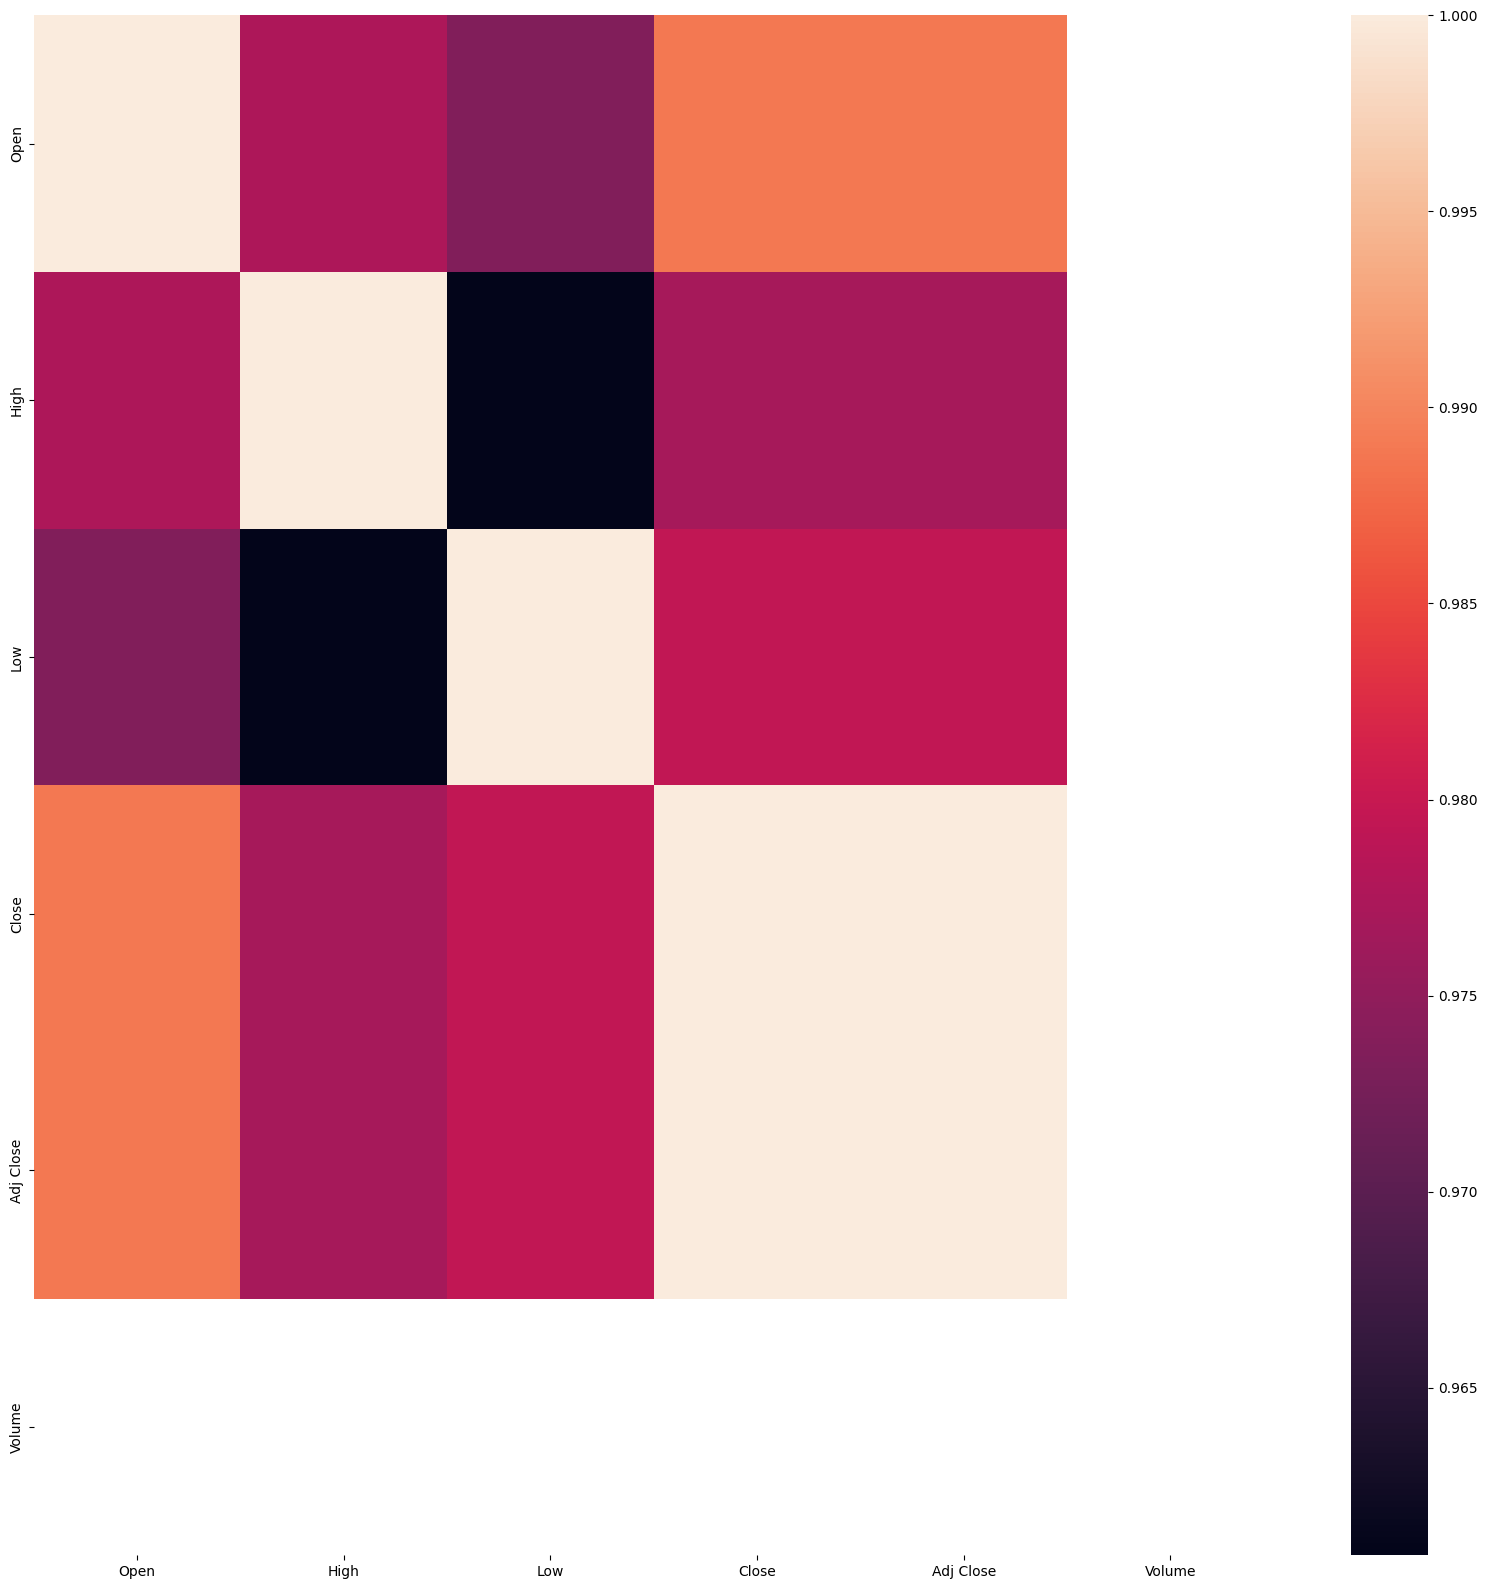

In [15]:
# We here looking at the data Visualization by heatmap.
plt.figure(figsize=(20,20))
sns.heatmap(drrr)

<Axes: >

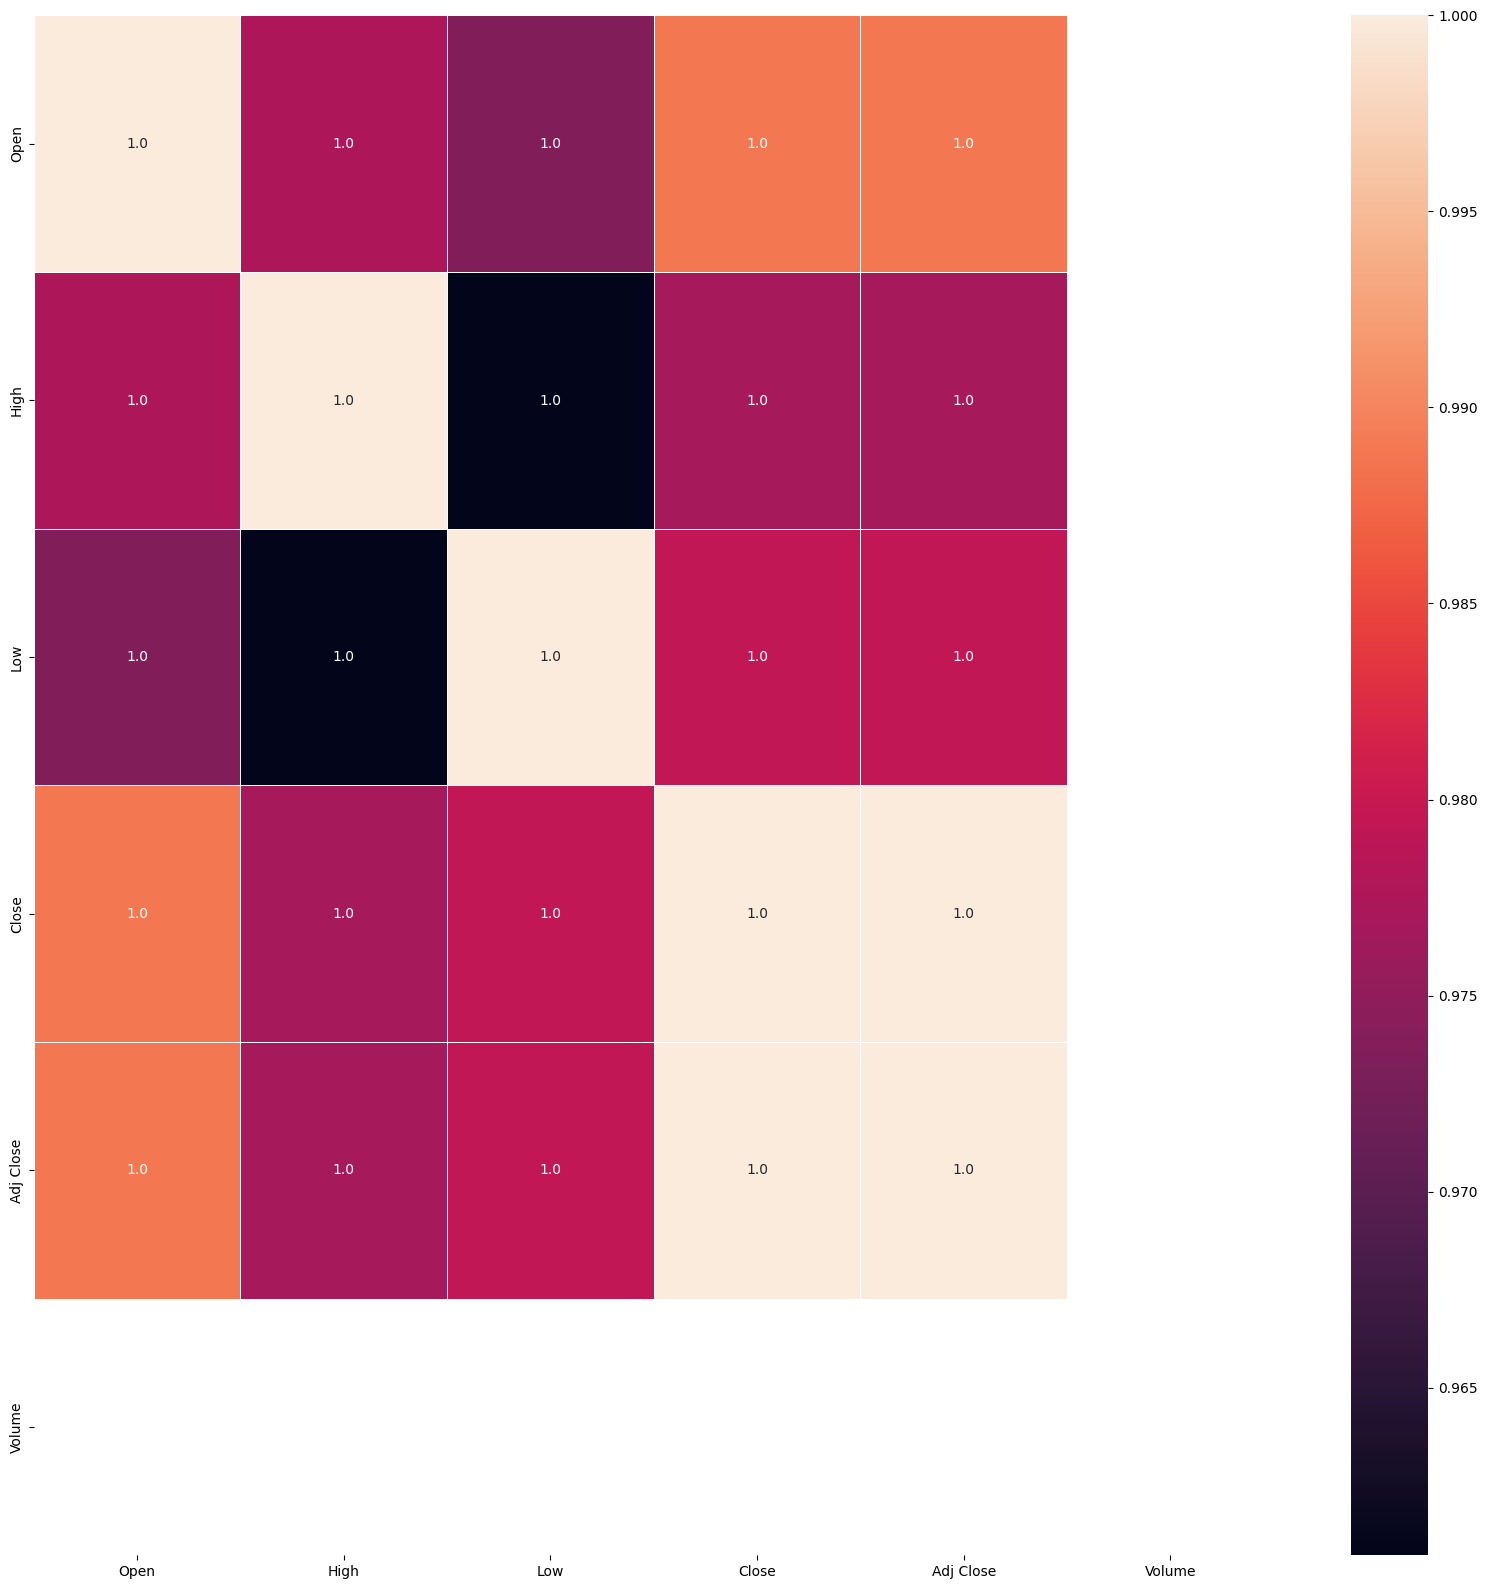

In [16]:
f,ax = plt.subplots(figsize=(20, 20))
sns.heatmap(drrr, annot=True, linewidths=.5, fmt= '.1f',ax=ax)

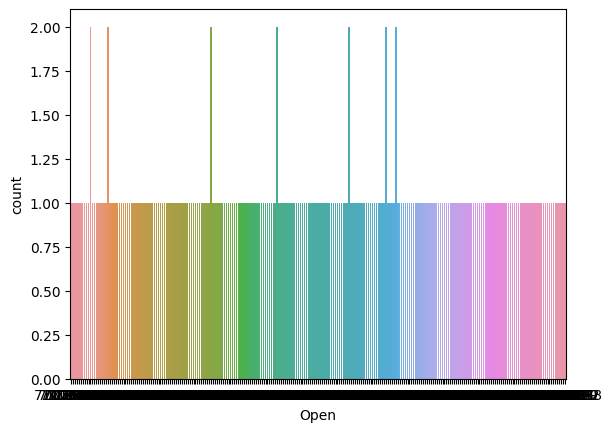

<Figure size 2000x2000 with 0 Axes>

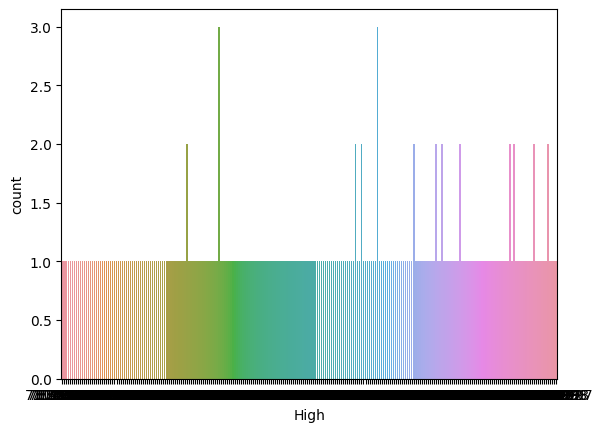

<Figure size 2000x2000 with 0 Axes>

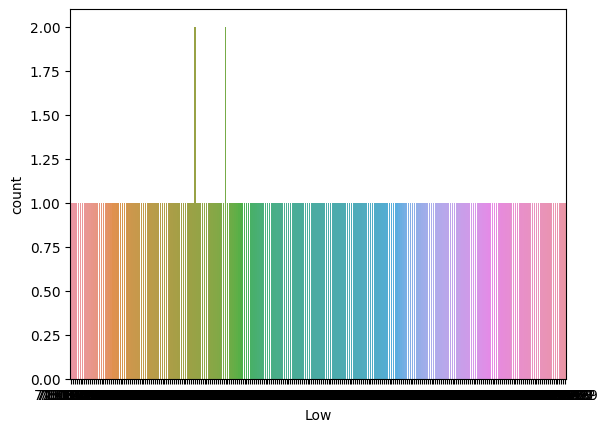

<Figure size 2000x2000 with 0 Axes>

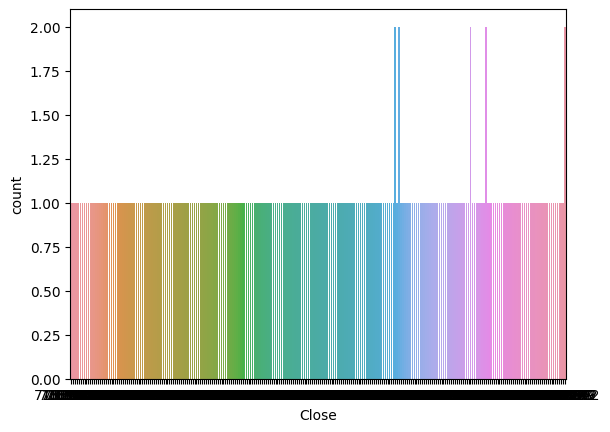

<Figure size 2000x2000 with 0 Axes>

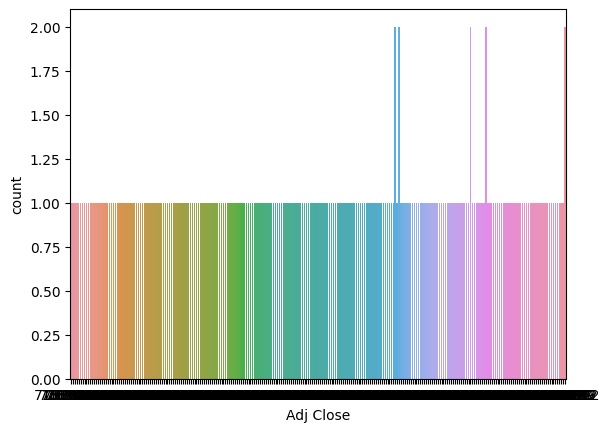

<Figure size 2000x2000 with 0 Axes>

In [17]:
# Original data.
for i in df.loc[:, ~df.columns.isin(["Date", "Volume"])]:
    f = sns.countplot(x=df[i]);
    plt.figure(figsize=(20,20))
    plt.show()

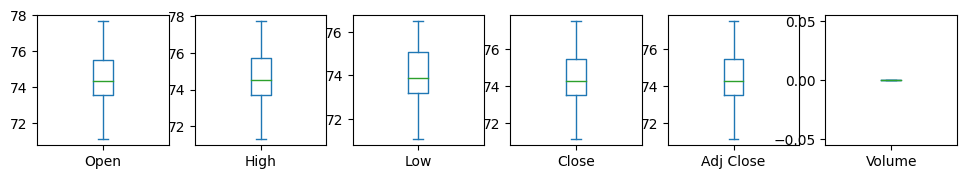

In [18]:
df.plot(kind='box',subplots=True,layout=(10,10),figsize=(20,20))
plt.show()

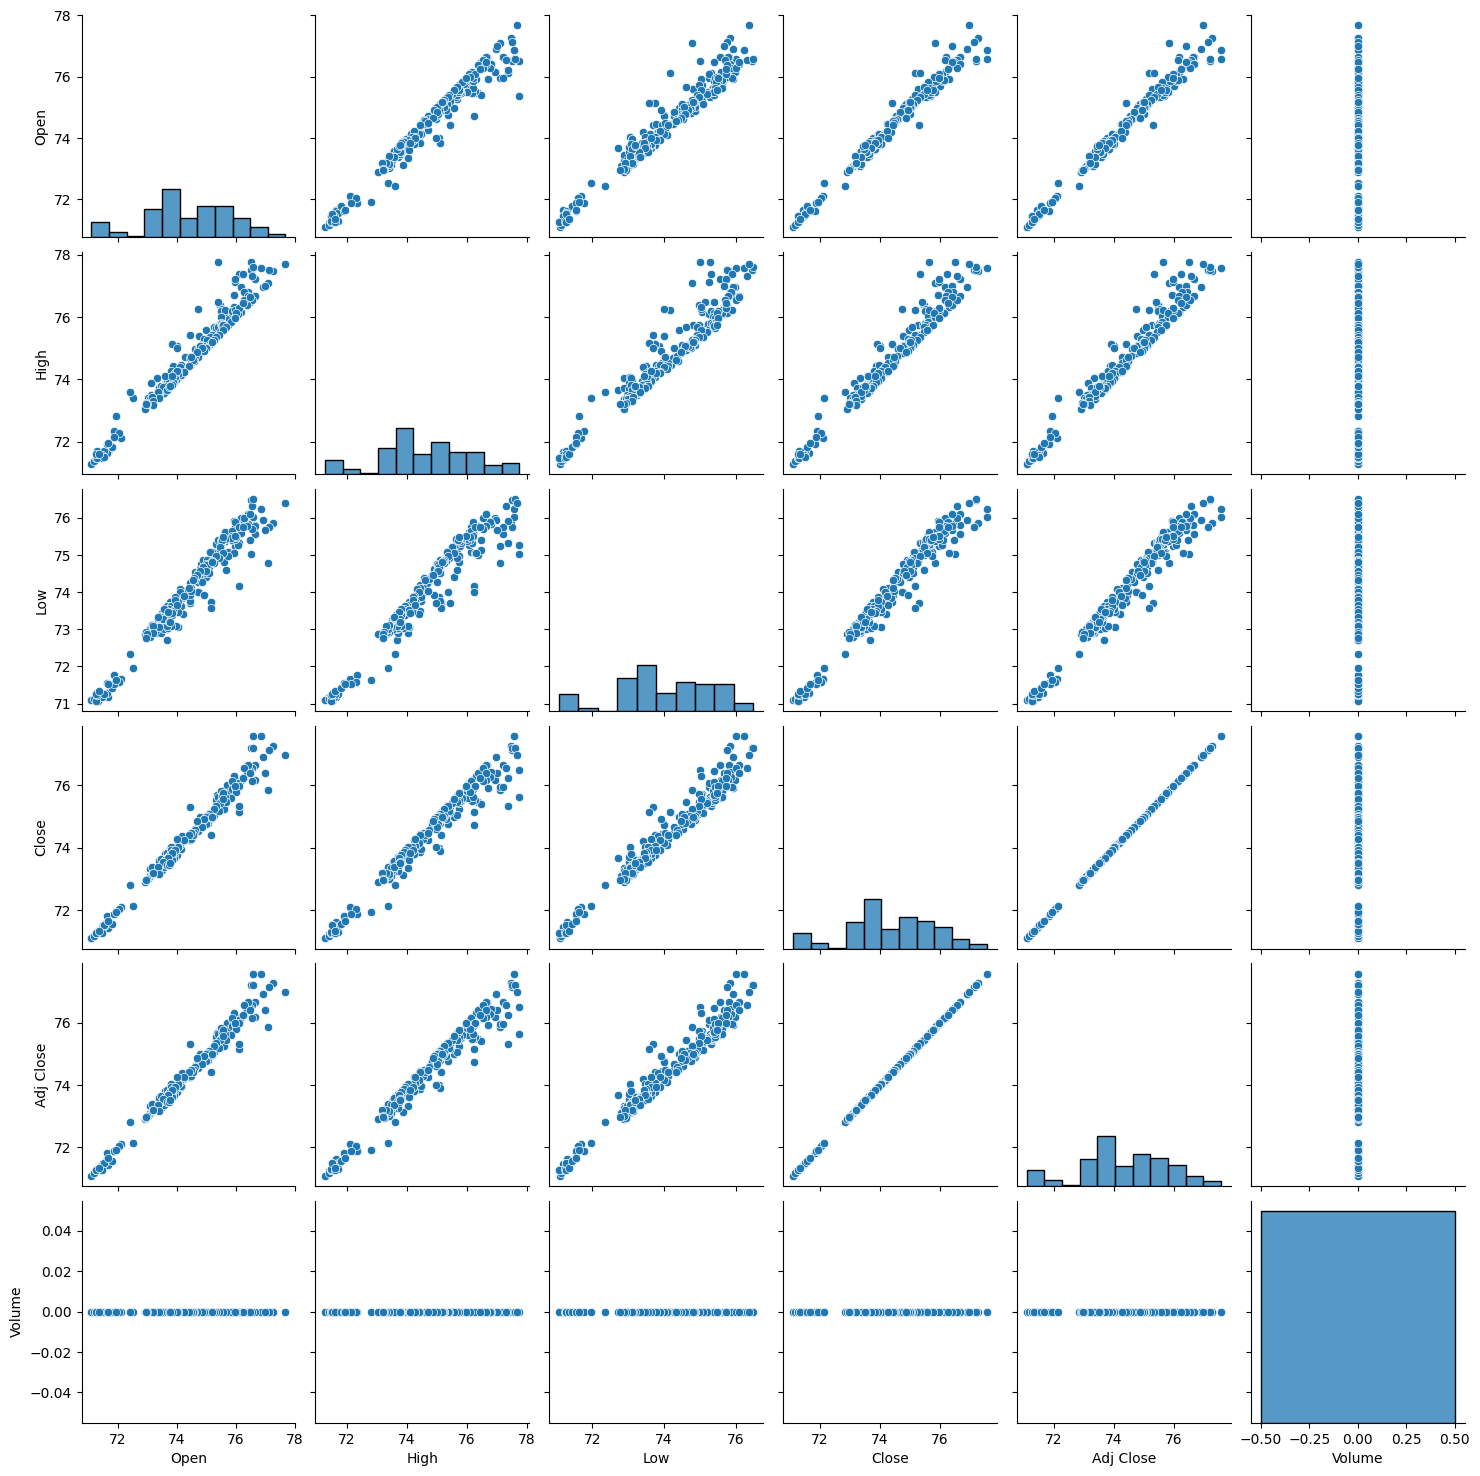

In [19]:
sns.pairplot(df)

# Splitting

In [20]:
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

In [21]:
train_data.shape, test_data.shape

((209, 6), (53, 6))

# Preprocessing

## Scale

In [22]:
scaler = MinMaxScaler()

In [23]:
scalerr = MinMaxScaler()

In [24]:
train_data_scaled = scaler.fit_transform(train_data)
train_data_scaled

array([[0.35227603, 0.34795347, 0.38215804, 0.32720314, 0.32720314,
        0.        ],
       [0.54352546, 0.54486503, 0.61968169, 0.55321467, 0.55321467,
        0.        ],
       [0.65294828, 0.68123619, 0.79669724, 0.69938185, 0.69938185,
        0.        ],
       ...,
       [0.68790776, 0.74684193, 0.79450627, 0.73415742, 0.73415742,
        0.        ],
       [0.74409998, 0.74745938, 0.81144256, 0.72485372, 0.72485372,
        0.        ],
       [0.80541005, 0.83011609, 0.9260346 , 0.85857794, 0.85857794,
        0.        ]])

In [25]:
test_data_scaled = scaler.transform(test_data)
test_data_scaled

array([[0.34541213, 0.33776134, 0.36798448, 0.34930484, 0.34930484,
        0.        ],
       [0.45855425, 0.48282702, 0.54102252, 0.47332304, 0.47332304,
        0.        ],
       [0.39783738, 0.40236321, 0.44345826, 0.40494624, 0.40494624,
        0.        ],
       [0.40467121, 0.38735178, 0.4296525 , 0.37877871, 0.37877871,
        0.        ],
       [0.84357443, 0.83011609, 0.8700546 , 0.78613639, 0.78613639,
        0.        ],
       [0.63019776, 0.61312776, 0.68245495, 0.64142206, 0.64142206,
        0.        ],
       [0.39470901, 0.40000074, 0.45198173, 0.40174717, 0.40174717,
        0.        ],
       [0.28786888, 0.2996143 , 0.3339278 , 0.29303005, 0.29303005,
        0.        ],
       [0.05613071, 0.0449421 , 0.02089264, 0.05718746, 0.05718746,
        0.        ],
       [0.57324665, 0.572973  , 0.64070484, 0.55966026, 0.55966026,
        0.        ],
       [0.12599059, 0.23706617, 0.10373126, 0.12828466, 0.12828466,
        0.        ],
       [0.40851336, 0

In [26]:
#Creating a data structure with 50 timesteps and 1 output, timestep is our memory size
#In this function we are creating our train data with 50x stock price and next one is 1 scrolled data.
#for example X_tain[0] will be our data's 0 to 49. values
#X_train[1] will be our data's 1 to 50. values
#this 50 is our memory size, it will remember this way what we had before.
X_train=[]
y_train=[]
timesteps=50
for i in range(timesteps,len(train_data_scaled)):
    X_train.append(train_data_scaled[i-timesteps:i,0])
    y_train.append(train_data_scaled[i,0])
X_train,y_train=np.array(X_train),np.array(y_train)

In [27]:
real_stock_price=test_data.loc[:,["Open"]].values

# Model

## Recurrent Neural Network (RNN)

In [28]:
regressor=Sequential()
#Adding the first RNN Layer and some Dropout Regularisation
regressor.add(SimpleRNN(units=50,activation="tanh",return_sequences=True,input_shape=(X_train.shape[1],1)))
regressor.add(Dropout(0,2))

#Adding the second RNN Layer and some Dropout Regularisation
regressor.add(SimpleRNN(units=50,activation="tanh",return_sequences=True))
regressor.add(Dropout(0,2))

#Adding the third RNN Layer and some Dropout Regularisation
regressor.add(SimpleRNN(units=50,activation="tanh",return_sequences=True))
regressor.add(Dropout(0,2))

#Adding the third RNN Layer and some Dropout Regularisation
regressor.add(SimpleRNN(units=50,activation="tanh",return_sequences=True))
regressor.add(Dropout(0,2))

#Adding the fourth RNN Layer and some Dropout Regularisation
regressor.add(SimpleRNN(units=50))
regressor.add(Dropout(0,2))

#Adding the output Layer
regressor.add(Dense(units=1))

In [29]:
regressor.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 50, 50)            2600      
                                                                 
 dropout (Dropout)           (None, 50, 50)            0         
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 50, 50)            5050      
                                                                 
 dropout_1 (Dropout)         (None, 50, 50)            0         
                                                                 
 simple_rnn_2 (SimpleRNN)    (None, 50, 50)            5050      
                                                                 
 dropout_2 (Dropout)         (None, 50, 50)            0         
                                                                 
 simple_rnn_3 (SimpleRNN)    (None, 50, 50)            5

In [30]:
#Compling the RNN
regressor.compile(optimizer="adam",loss="mean_squared_error")

In [31]:
#Fitting the RNN to the Training set
regressor.fit(X_train,y_train,epochs=50,batch_size=32)

Epoch 1/50
5/5 [==============================] - 6s 83ms/step - loss: 0.4744
Epoch 2/50
5/5 [==============================] - 0s 80ms/step - loss: 0.1022
Epoch 3/50
5/5 [==============================] - 0s 73ms/step - loss: 0.0561
Epoch 4/50
5/5 [==============================] - 0s 69ms/step - loss: 0.0541
Epoch 5/50
5/5 [==============================] - 0s 74ms/step - loss: 0.0482
Epoch 6/50
5/5 [==============================] - 0s 70ms/step - loss: 0.0539
Epoch 7/50
5/5 [==============================] - 0s 70ms/step - loss: 0.0540
Epoch 8/50
5/5 [==============================] - 0s 70ms/step - loss: 0.0512
Epoch 9/50
5/5 [==============================] - 0s 73ms/step - loss: 0.0516
Epoch 10/50
5/5 [==============================] - 0s 66ms/step - loss: 0.0506
Epoch 11/50
5/5 [==============================] - 0s 68ms/step - loss: 0.0504
Epoch 12/50
5/5 [==============================] - 0s 77ms/step - loss: 0.0514
Epoch 13/50
5/5 [==============================] - 0s 78ms/st

In [32]:
dataset_total=pd.concat((train_data["Open"],test_data["Open"]), axis=0)
inputs= dataset_total[len(dataset_total)-len(train_data)-timesteps:].values.reshape(-1,1)
inputs=scalerr.fit_transform(inputs)

In [33]:
#prediction
X_test=[]
for i in range(timesteps,timesteps+len(test_data_scaled)):
    X_test.append(inputs[i-timesteps:i,0])
X_test=np.array(X_test)
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
predicted_stock_price=regressor.predict(X_test)
predicted_stock_price=scalerr.inverse_transform(predicted_stock_price)#we had scaled between 0-1 data, inversing it

2/2 [==============================] - 1s 34ms/step


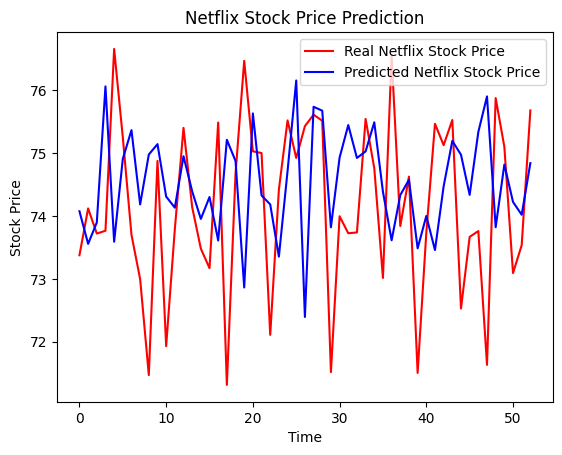

In [34]:
#visualising
plt.plot(real_stock_price,color="red",label="Real Netflix Stock Price")
plt.plot(predicted_stock_price,color="blue",label="Predicted Netflix Stock Price")
plt.title("Netflix Stock Price Prediction")
plt.xlabel("Time")
plt.ylabel("Stock Price")
plt.legend()
plt.show()

## Long Short Term Memory (LSTM)

In [35]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units = 1))

In [36]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50, 50)            10400     
                                                                 
 dropout_5 (Dropout)         (None, 50, 50)            0         
                                                                 
 lstm_1 (LSTM)               (None, 50, 50)            20200     
                                                                 
 dropout_6 (Dropout)         (None, 50, 50)            0         
                                                                 
 lstm_2 (LSTM)               (None, 50, 50)            20200     
                                                                 
 dropout_7 (Dropout)         (None, 50, 50)            0         
                                                                 
 lstm_3 (LSTM)               (None, 50, 50)           

In [37]:
model.compile(loss = 'mean_squared_error', optimizer = 'Adam')

In [38]:
model.fit(X_train, y_train, epochs = 10, batch_size = 32)

Epoch 1/10
5/5 [==============================] - 15s 185ms/step - loss: 0.1860
Epoch 2/10
5/5 [==============================] - 1s 174ms/step - loss: 0.0817
Epoch 3/10
5/5 [==============================] - 1s 182ms/step - loss: 0.0731
Epoch 4/10
5/5 [==============================] - 1s 172ms/step - loss: 0.0605
Epoch 5/10
5/5 [==============================] - 1s 175ms/step - loss: 0.0538
Epoch 6/10
5/5 [==============================] - 1s 177ms/step - loss: 0.0544
Epoch 7/10
5/5 [==============================] - 1s 186ms/step - loss: 0.0537
Epoch 8/10
5/5 [==============================] - 1s 181ms/step - loss: 0.0524
Epoch 9/10
5/5 [==============================] - 1s 179ms/step - loss: 0.0523
Epoch 10/10
5/5 [==============================] - 1s 299ms/step - loss: 0.0507


In [39]:
dataset_total=pd.concat((train_data["Open"],test_data["Open"]), axis=0)
inputs= dataset_total[len(dataset_total)-len(test_data)-timesteps:].values.reshape(-1,1)
inputs=scalerr.transform(inputs)

In [40]:
#prediction
X_test=[]
for i in range(timesteps,timesteps+len(test_data)):
    X_test.append(inputs[i-timesteps:i,0])
X_test=np.array(X_test)
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
predicted_stock_price=model.predict(X_test)
predicted_stock_price=scalerr.inverse_transform(predicted_stock_price)#we had scaled between 0-1 data, inversing it

2/2 [==============================] - 3s 41ms/step


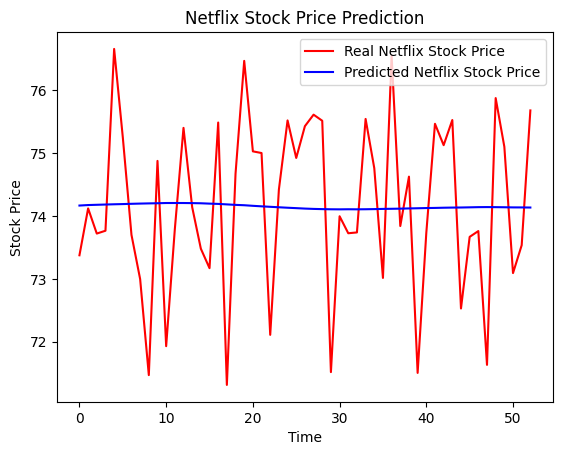

In [41]:
#visualising
plt.plot(real_stock_price,color="red",label="Real Netflix Stock Price")
plt.plot(predicted_stock_price,color="blue",label="Predicted Netflix Stock Price")
plt.title("Netflix Stock Price Prediction")
plt.xlabel("Time")
plt.ylabel("Stock Price")
plt.legend()
plt.show()